# **Identificação de Faces e Objetos**

## **Primeiro, vamos fazer na "raça"**

Identificar objetos é uma das muitas aplicações que podemos fazer em visão computacional, porém, não é uma tarefa fácil.

Vimos em aulas anteriores que podemos manipular imagens e e identificar alguma região de interesse (ROI) através da manipulação dos canais de cores e aplicação de filtros e mascaras.

Por exemplo, vamos usar a imagem do Pikachu e selecionar somente as áreas das bochechas vermelhas:

Primeiro, vamos importar as bibliotecas que precisamos

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt

Agora vamos carregar a imagem com o openCV

In [ ]:
img = cv2.imread('/content/pikachu50.png')

In [ ]:
cv2_imshow(img)

Agora vamos converter a imagem para o dominio do HSV (Matiz, Saturação e Brilho)

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_hsv)
plt.show()

Agora, vamos aplicar uma mascara em cima das bochechas do Pikachu. Sabemos que elas são da cor vermelha, e o que o vermelho pode assumir valores de [0,50,50] até [10,255,255] no espectro HSV. Podemos determinar os valores das cores facilmente usando uma ferramenta online: [Color Picker](https://colorpicker.me/#ff0200)

Para mais detalhes sobre como funciona o Espectro HSV, podemos acessar ese [Material](https://docplayer.com.br/11738620-Cores-em-computacao-grafica.html)

In [ ]:
# Definição dos valores minimo e max da mascara
# Define os valores mínimos e máximos de HSV para a cor vermelha
image_lower_hsv = np.array([0, 50, 50])
image_upper_hsv = np.array([10, 255, 255])

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

Podemos aplicar esse principio em qualquer imagem. Nós identificamos em qual posição da imagem está um "objeto" de interece e o isolamos, mas fizemos isso na "mão" e já sabiamos previamente o que queriamos.

### E com faces?

Poderiamos partir do mesmo principio para reconhecer faces, porém temos alguns problemas:

- As faces não seguem um padrão de cores, como nos desenhos;
- As faces, e qualquer outra caracteristica humana não possui os mesmos formatos de individuo para individuo;

Aplicar esse tipo de tratamento, pode ser exaustivo, complexo e com pouca acurácia!


Apesar, disso, existem alguns padrões que podemos tomar como "certos", por exemplo, um rosto possui dois olhos, sobrancelhas, nariz e boca... Então podemos ir atrás desse tipo da Padrão e detectar uma face !?

Ou não...?

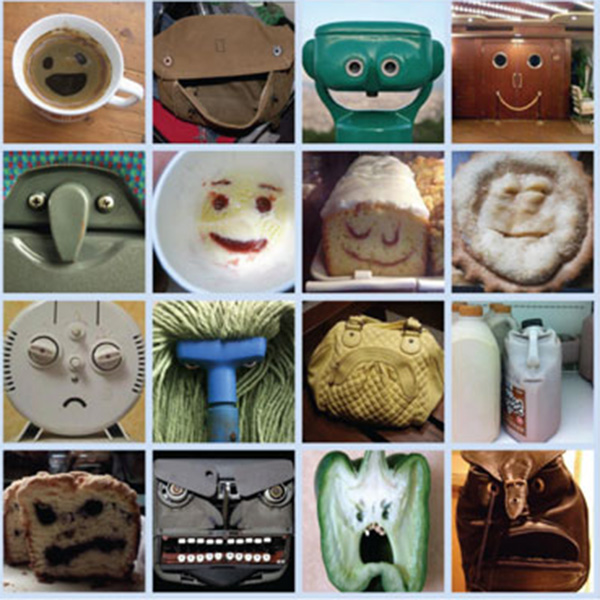

## **Agora vamos usar um classificaro automático: O Haar Cascade**

O Haar Cascade é um algoritmo de detecção de objetos em imagens que foi criado por Paul Viola e Michael Jones, sendo publicado em artigo em 2001 que você pode conferir nesse [link](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf). Sendo considerado como, basicamente, filtros que procuram por variações intensas de cor ou intensidade de pixels em uma determinada área da imagem.

O Haar Cascade é treinado usando um conjunto de imagens positivas (contendo objetos que se deseja detectar) e negativas (imagens que não contêm os objetos).


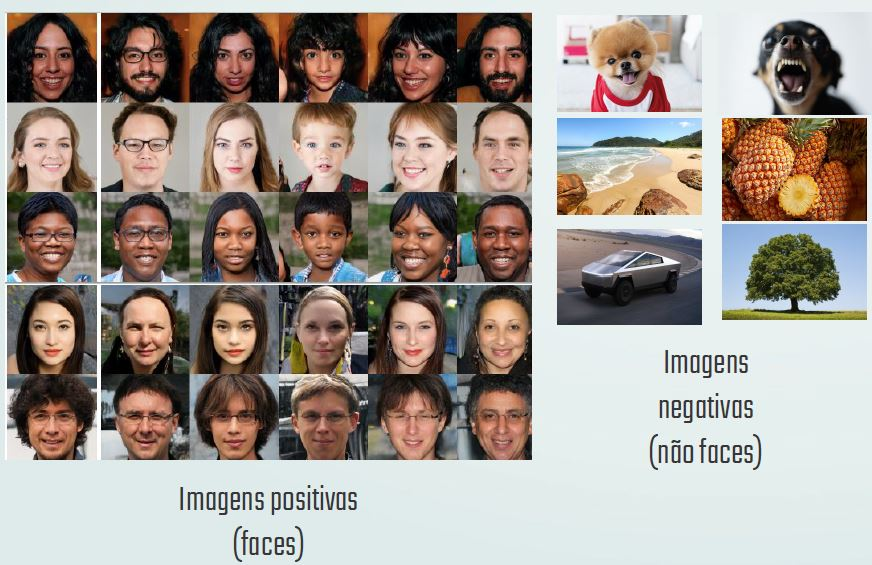

O treinamento envolve a seleção de um conjunto de recursos Haar que melhor discriminam entre as imagens positivas e negativas. Em seguida, esses recursos são combinados em um classificador em cascata, que é capaz de detectar objetos em novas imagens.

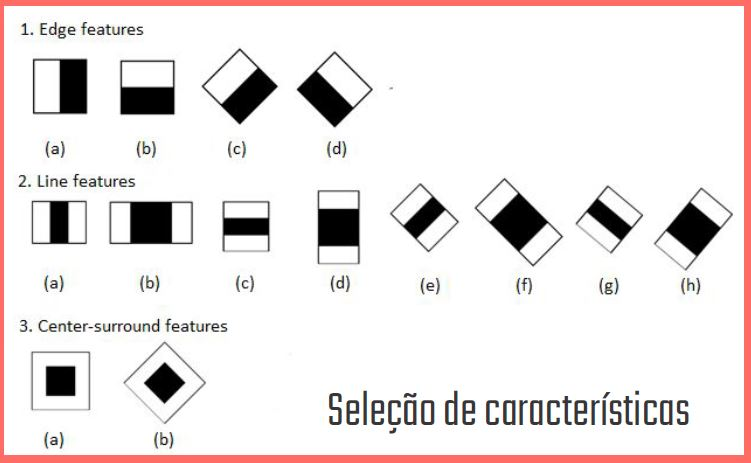

Durante a detecção, o classificador em cascata analisa a imagem em várias escalas e posições, aplicando os recursos Haar em cada região da imagem. Se a região da imagem corresponder a um objeto que o classificador foi treinado para detectar, ela será marcada como uma detecção positiva.

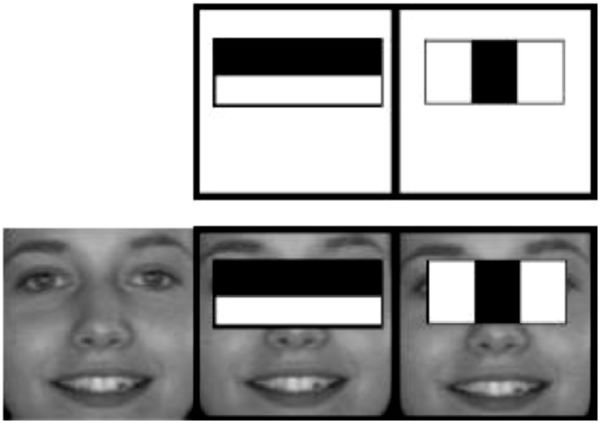

O Haar Cascade é um algoritmo eficiente e rápido para detecção de objetos em imagens, o que o torna adequado para aplicações em tempo real, como detecção de rostos em câmeras de vigilância, reconhecimento facial em dispositivos móveis, entre outros

## **Vamos aplicar esse classificador para detectar faces em imagens**

Primeiro vamos carregar uma imagem

In [ ]:
imagem = cv2.imread('/content/faces.png')
cv2_imshow(imagem)

Depois, para facilitar a vida do classificador, vamos converter a imagem para cinza

In [ ]:
imagemCinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
cv2_imshow(imagemCinza)

Em seguida, vamos carregar o nosso classificador. O OpenCV já possui uma série de classificadores pré definidos, e estão disponíveis na pasta "Classifiers" da instalação do OpenCV ou no git do projeto [aqui](https://github.com/opencv/opencv/tree/master/data/haarcascades).

Podemos acessar os classificadores via o caminho de instalação ou via o método cv2.data.haarcascades + "o nome do classificador que queremos."

In [ ]:
classificador = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

Agora, vamos usar o classificador para detectar as faces nessa imagem, para isso, vamos usar o método detectMultiScale, com os seguintes parâmetros:

- imagemCinza: É a imagem de entrada em escala de cinza na qual o objeto deve ser detectado.

- scaleFactor: É um parâmetro que especifica o quanto a imagem deve ser reduzida a cada escala. Um valor de 1.3 significa que a imagem será reduzida em 30% a cada escala. Usar um valor maior reduzirá o tempo de processamento, mas pode afetar a precisão da detecção.

- minNeighbors: É um parâmetro que especifica quantos vizinhos próximos cada retângulo candidato deve ter para ser considerado uma detecção válida. Esse parâmetro é útil para reduzir falsos positivos. Quanto maior o valor, menos detecções serão feitas, mas a precisão será maior.

In [ ]:
faces = classificador.detectMultiScale(imagemCinza, 1.3,5)

E por fim, vamos verificar quantas faces ele detectou:

In [ ]:
len(faces)

Se pegarmos as informações da face no indice 0, teremos a localização na imagem em que ela foi detectada...

In [ ]:
faces[0]

... E dessa forma, conseguimos desenhar um retangulo na face encontrada

In [ ]:
imagemAnotada = imagem.copy()
for (x,y,w,h) in faces:
  cv2.rectangle(imagemAnotada, (x,y), (x+w, y+h), (255,0,0),2)

In [ ]:
cv2_imshow(imagemAnotada)

Podemos inclusive, salvar cada face em um arquivo diferente...

In [ ]:
faceImagem = 0

for (x,y,w,h) in faces:
  faceImagem += 1
  imagemRoi = imagem[y:y+h, x:x+w]
  cv2.imwrite("face_" + str(faceImagem) + ".png", imagemRoi)

## **E com video**?

Para usarmos a funcionalidade de video com OpenCV e Python, basta usarmos o código abaixo



```
camera = cv2.VideoCapture(0) # 0 = Camera principal, 1 = camera segundaria, etc

while cv2.waitKey(1) == -1: #espera digitar q para fechar a camera
    status, imagem = camera.read()
    cv2.imshow("camera", imagem)
camera.release
cv2.destroyAllWindows()
```

Porém, como estamos num ambiente web, não é tão facil assim... precisamos usar um snippet do Colabs:


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

E esse snippet nos mostra o video da camera

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Vamos aplicar o Haar Cascade no video agora

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  img = cv2.imread(filename)
  imgCinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  faces = classificador.detectMultiScale(imgCinza, 1.3,5)
  imagemAnotada = img.copy()
  for (x,y,w,h) in faces:
    cv2.rectangle(imagemAnotada, (x,y), (x+w, y+h), (255,0,0),2)
  # Show the image which was just taken.
  cv2_imshow(imagemAnotada)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## **Temos outros Classificadores?**

### O Classificador YOLO (You Only Look Once)

O Haar Cascade proposto pro Viola e Jonse foi um dos primeiros classificadores desenvolvidos e de fato está "defasado" em comparação ás técnicas atuais, porém esse modelo tem servido de base para esses mesmos classificadores modernos.

Nesta seção, vamos apresentar um outro classificador: o [Yolo](https://pytorch.org/hub/ultralytics_yolov5/)


Esse modelo é baseado em redes neurais para identificar objetos em imagens, todos de uma vez. Não vamos entrar nos detalhes de como ele funciona, mas você pode se aprofundar pela documentação ou por esse [artigo](https://www.v7labs.com/blog/yolo-object-detection).

In [ ]:
!pip install torch==1.11.0 torchvision torchaudio

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r yolov5/requirements.txt

In [ ]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
modelo = torch.hub.load('ultralytics/yolov5','yolov5n')

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  saida = modelo(filename)
  imagem=(np.squeeze(saida.render()))
  img_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
  cv2_imshow(img_rgb)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## **Agora uma aplicação COMPLETA!**

Vamos usar um modelo de classificação e identificação já treinado para um caso específico usando o [Teachable Machine](https://teachablemachine.withgoogle.com/) do Google: 

Vamos usar o modelo de código que ele nos fornece, mas fazendo algumas modificações...

In [ ]:
import PIL
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

In [ ]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model('/content/keras_model.h5', compile=False)

# Load the labels
class_names = open('/content/labels.txt', "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [ ]:
# Replace this with the path to your image
image = Image.open('/content/Capturar.JPG').convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
#image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image = image.resize(size,resample=Image.BICUBIC)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

In [ ]:
# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

**E agora com video!**

In [ ]:
from IPython.display import Image
from PIL import Image as IM
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Replace this with the path to your image
  image = IM.open('/content/photo.jpg').convert("RGB")

  # resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  #image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
  image = image.resize(size,resample=IM.BICUBIC)

  # turn the image into a numpy array
  image_array = np.asarray(image)

  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

  # Load the image into the array
  data[0] = normalized_image_array

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)